In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)

%matplotlib inline
np.random.seed(42)

In [10]:
data = pd.read_csv("honeyproduction.csv").rename(columns={
    'state':'state_code',
    'num_of_col':'n_colony',
    'yield_per_col':'production_per_colony',
    'total_prod':'total_production',
    'stocks':'stock_held',
    'price_per_lb':'price_per_lb',
    'prod_value':'total_production_value'
})

state_code_to_name = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
data['consumption'] = data['total_production'] - data['stock_held']
data['state'] = data['state_code'].apply(lambda x: state_code_to_name[x])
inflation_rate = {
    1998: 1.454,
    1999: 1.423,
    2000: 1.376,
    2001: 1.339,
    2002: 1.317,
    2003: 1.288,
    2004: 1.255,
    2005: 1.214,
    2006: 1.176,
    2007: 1.143,
    2008: 1.101,
    2009: 1.105,
    2010: 1.087,
    2011: 1.054,
    2012: 1.032
}

monetized_features = ['price_per_lb', 'total_production_value']

for year in set(data['year']):
    for feature in monetized_features:
        data.loc[data['year']==year, feature] = inflation_rate[year]*data.loc[data['year']==year, feature]
data.sample(5)

,state_code,n_colony,production_per_colony,total_production,stock_held,price_per_lb,total_production_value,year,consumption,state
448,NJ,9000,40,360000.0,122000,1.78362,641883.0,2008,238000.0,New Jersey
486,MT,146000,70,10220000.0,3577000,1.61330,16487705.0,2009,6643000.0,Montana
215,WI,70000,95,6650000.0,2461000,1.76478,11735787.0,2002,4189000.0,Wisconsin
212,VA,8000,38,304000.0,79000,2.50230,761226.0,2002,225000.0,Virginia
481,ME,6000,50,300000.0,51000,2.15475,646425.0,2009,249000.0,Maine


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 10 columns):
state_code                626 non-null object
n_colony                  626 non-null int64
production_per_colony     626 non-null int64
total_production          626 non-null float64
stock_held                626 non-null int64
price_per_lb              626 non-null float64
total_production_value    626 non-null float64
year                      626 non-null int64
consumption               626 non-null float64
state                     626 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 49.0+ KB


In [19]:
data.columns

Index(['state_code', 'n_colony', 'production_per_colony', 'total_production',
       'stock_held', 'price_per_lb', 'total_production_value', 'year',
       'consumption', 'state'],
      dtype='object')

In [20]:
data.dtypes

state_code                 object
n_colony                    int64
production_per_colony       int64
total_production          float64
stock_held                  int64
price_per_lb              float64
total_production_value    float64
year                        int64
consumption               float64
state                      object
dtype: object

In [22]:
data.isnull().sum(axis=0)

state_code                0
n_colony                  0
production_per_colony     0
total_production          0
stock_held                0
price_per_lb              0
total_production_value    0
year                      0
consumption               0
state                     0
dtype: int64

In [25]:
data.groupby('state').size()

state
Alabama           15
Arizona           15
Arkansas          15
California        15
Colorado          15
Florida           15
Georgia           15
Hawaii            15
Idaho             15
Illinois          15
Indiana           15
Iowa              15
Kansas            15
Kentucky          15
Louisiana         15
Maine             15
Maryland           6
Michigan          15
Minnesota         15
Mississippi       15
Missouri          15
Montana           15
Nebraska          15
Nevada            11
New Jersey        15
New Mexico        15
New York          15
North Carolina    15
North Dakota      15
Ohio              15
Oklahoma           6
Oregon            15
Pennsylvania      15
South Carolina     3
South Dakota      15
Tennessee         15
Texas             15
Utah              15
Vermont           15
Virginia          15
Washington        15
West Virginia     15
Wisconsin         15
Wyoming           15
dtype: int64

In [26]:
data = data[data.state != 'Maryland']
data = data[data.state != 'Oklahoma']
data = data[data.state != 'South Carolina']

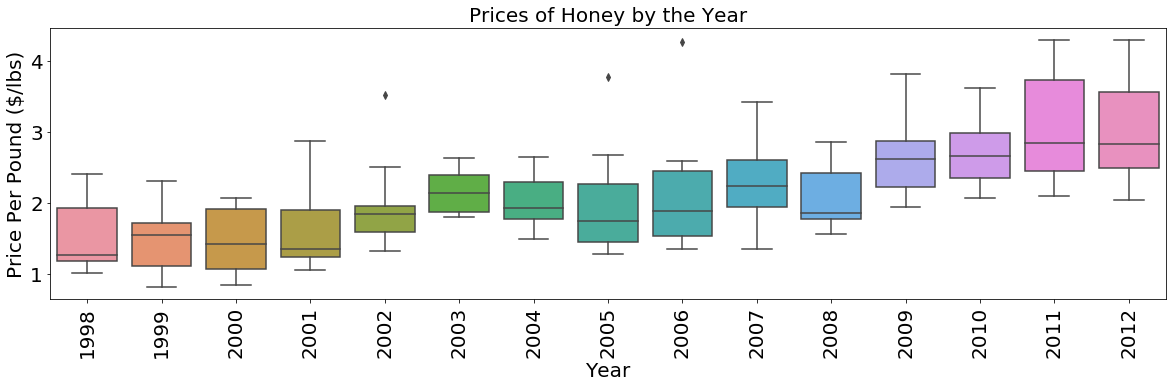

In [18]:
df_states_consumption = data.loc[data['state'].isin(list(data[['state','price_per_lb']].groupby('state').sum().sort_values(by='price_per_lb', ascending=False).head(16).reset_index().state.values))]
df_prices_by_year = data[['year','price_per_lb']]
plt.figure(figsize=(20,5))
sns.boxplot(data=df_top10_states_consumption, x='year',y='price_per_lb')
plt.title("Prices of Honey by the Year")
plt.ylabel("Price Per Pound ($/lbs)")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.show()

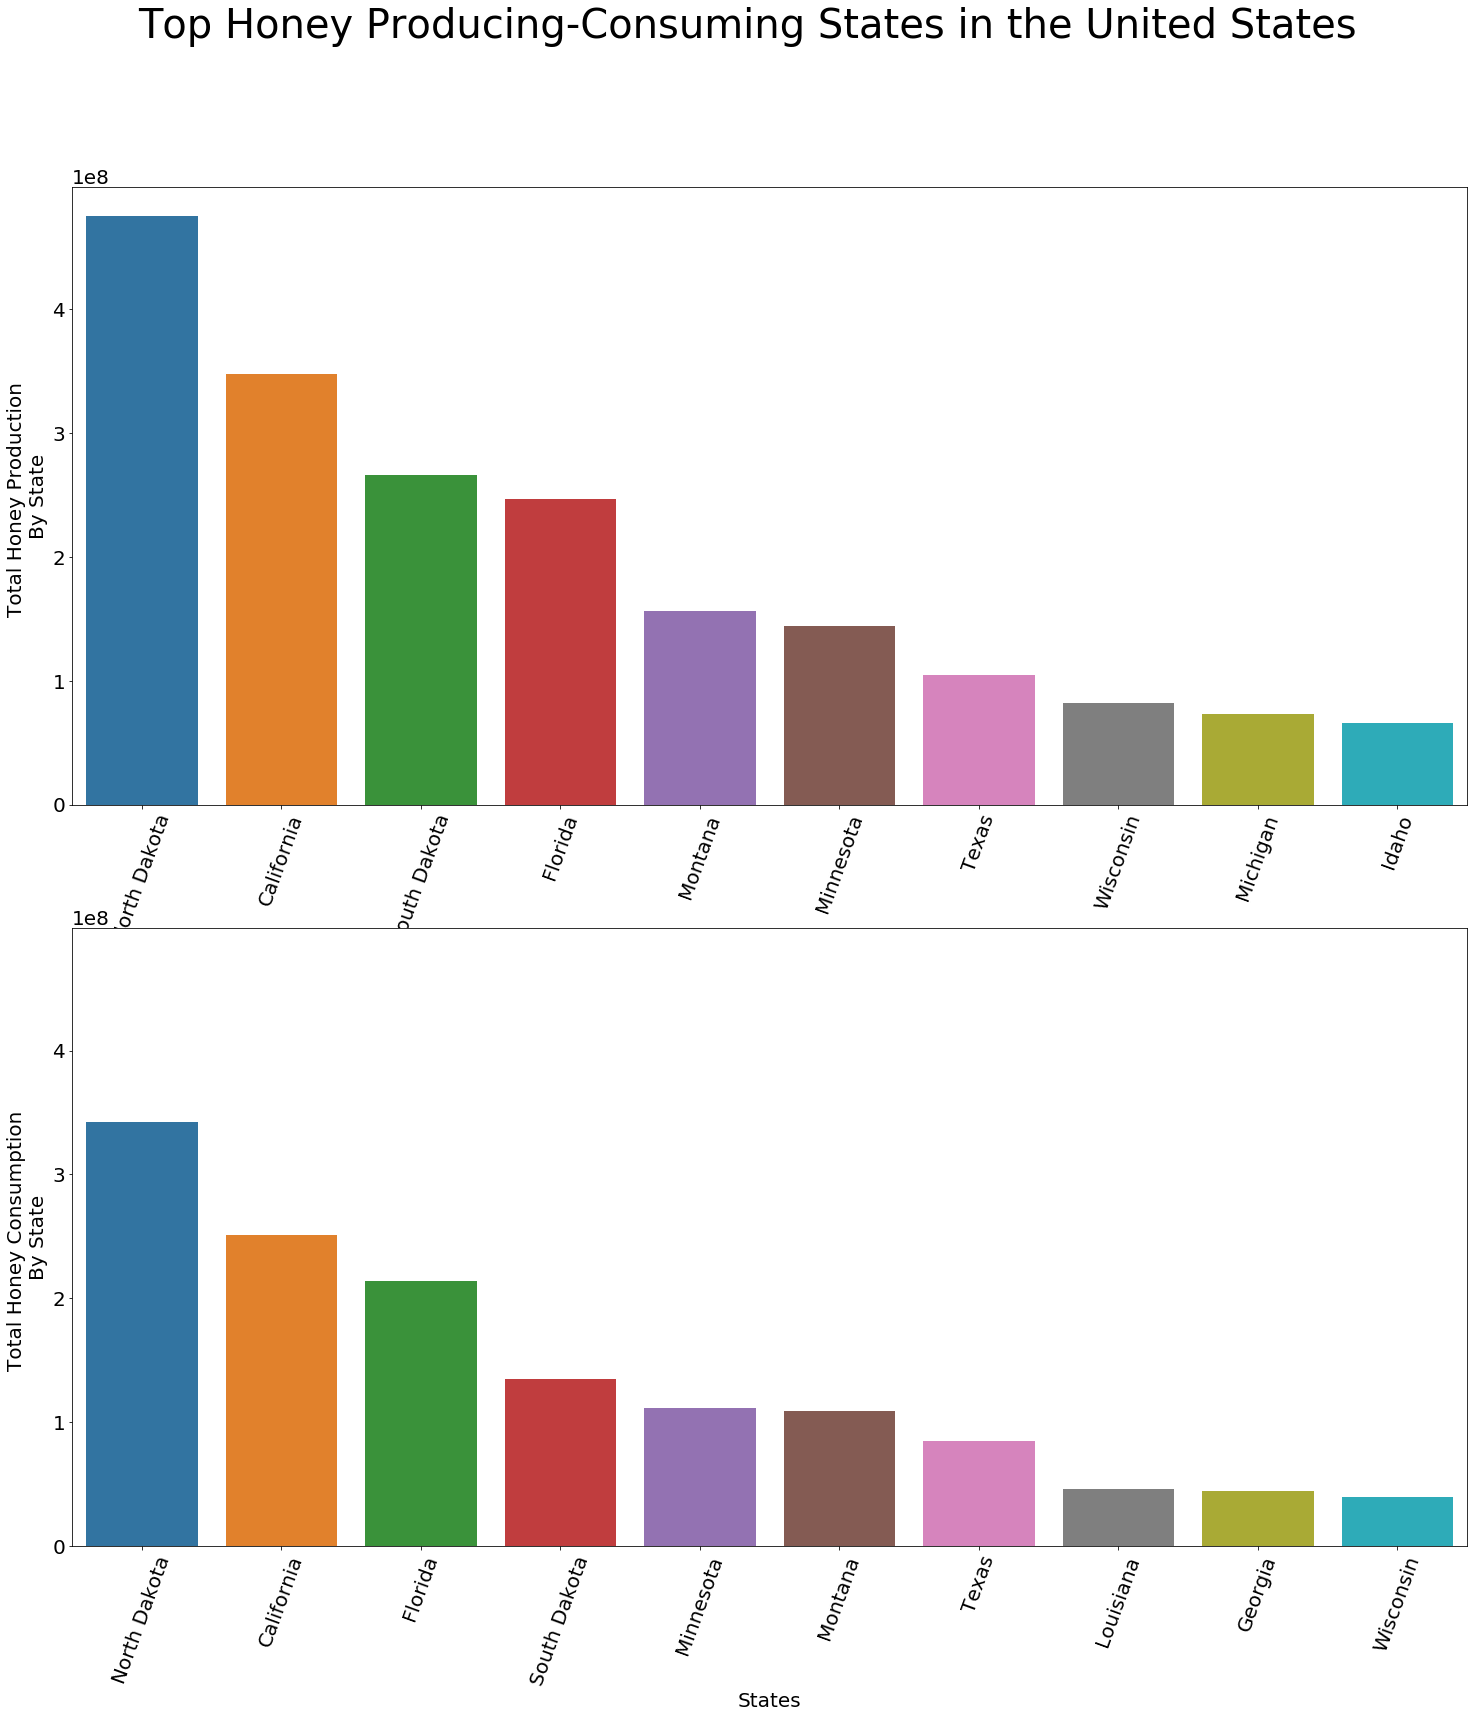

In [60]:
top10_states_by_production = data[['state','total_production']].groupby('state').sum().sort_values(by='total_production', ascending=False).head(10).reset_index()
top10_states_by_consumption = data[['state','consumption']].groupby('state').sum().sort_values(by='consumption', ascending=False).head(10).reset_index()

f, (ax1,ax2) = plt.subplots(2,1, figsize = (25,25), sharey=True)

plt.suptitle("Top Honey Producing-Consuming States in the United States", fontsize = 40)
sns.barplot(data=top10_states_by_production, x='state', y='total_production', ax=ax1)
ax1.set(xlabel='States', ylabel='Total Honey Production \nBy State')
sns.barplot(data=top10_states_by_consumption, x='state', y='consumption', ax=ax2)
ax2.set(xlabel='States', ylabel='Total Honey Consumption \nBy State')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)
plt.show()

states_production = data[['state','total_production']].groupby('state').sum().sort_values(by='total_production', ascending=False).reset_index()
states_production_dict = dict(zip(states_production.state, states_production.total_production))

        
plt.show()

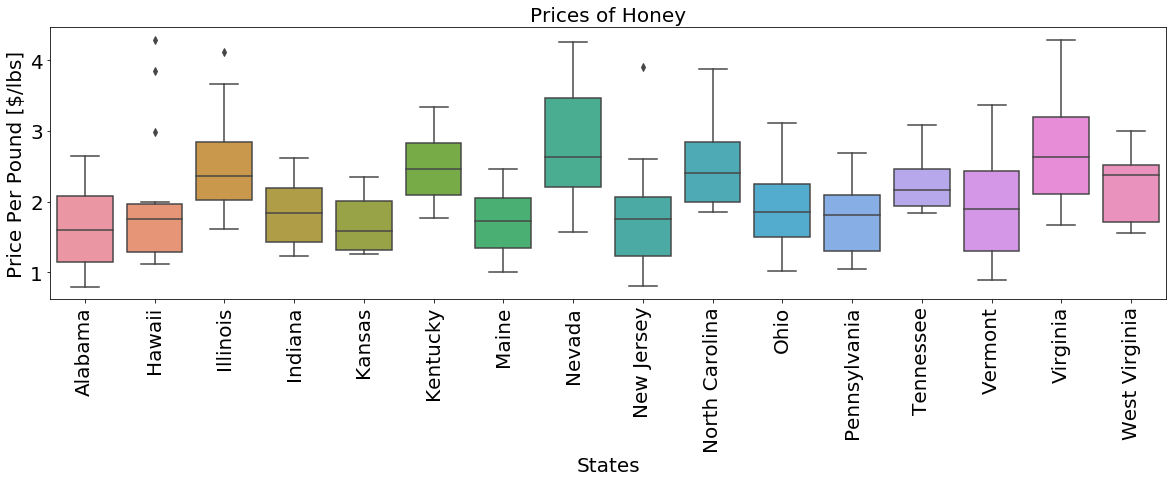

In [68]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df_states_consumption, x = 'state', y = 'price_per_lb')
plt.title('Prices of Honey')
plt. ylabel('Price Per Pound [$/lbs]')
plt.xlabel('States')
plt.xticks(rotation=90)
plt.show()

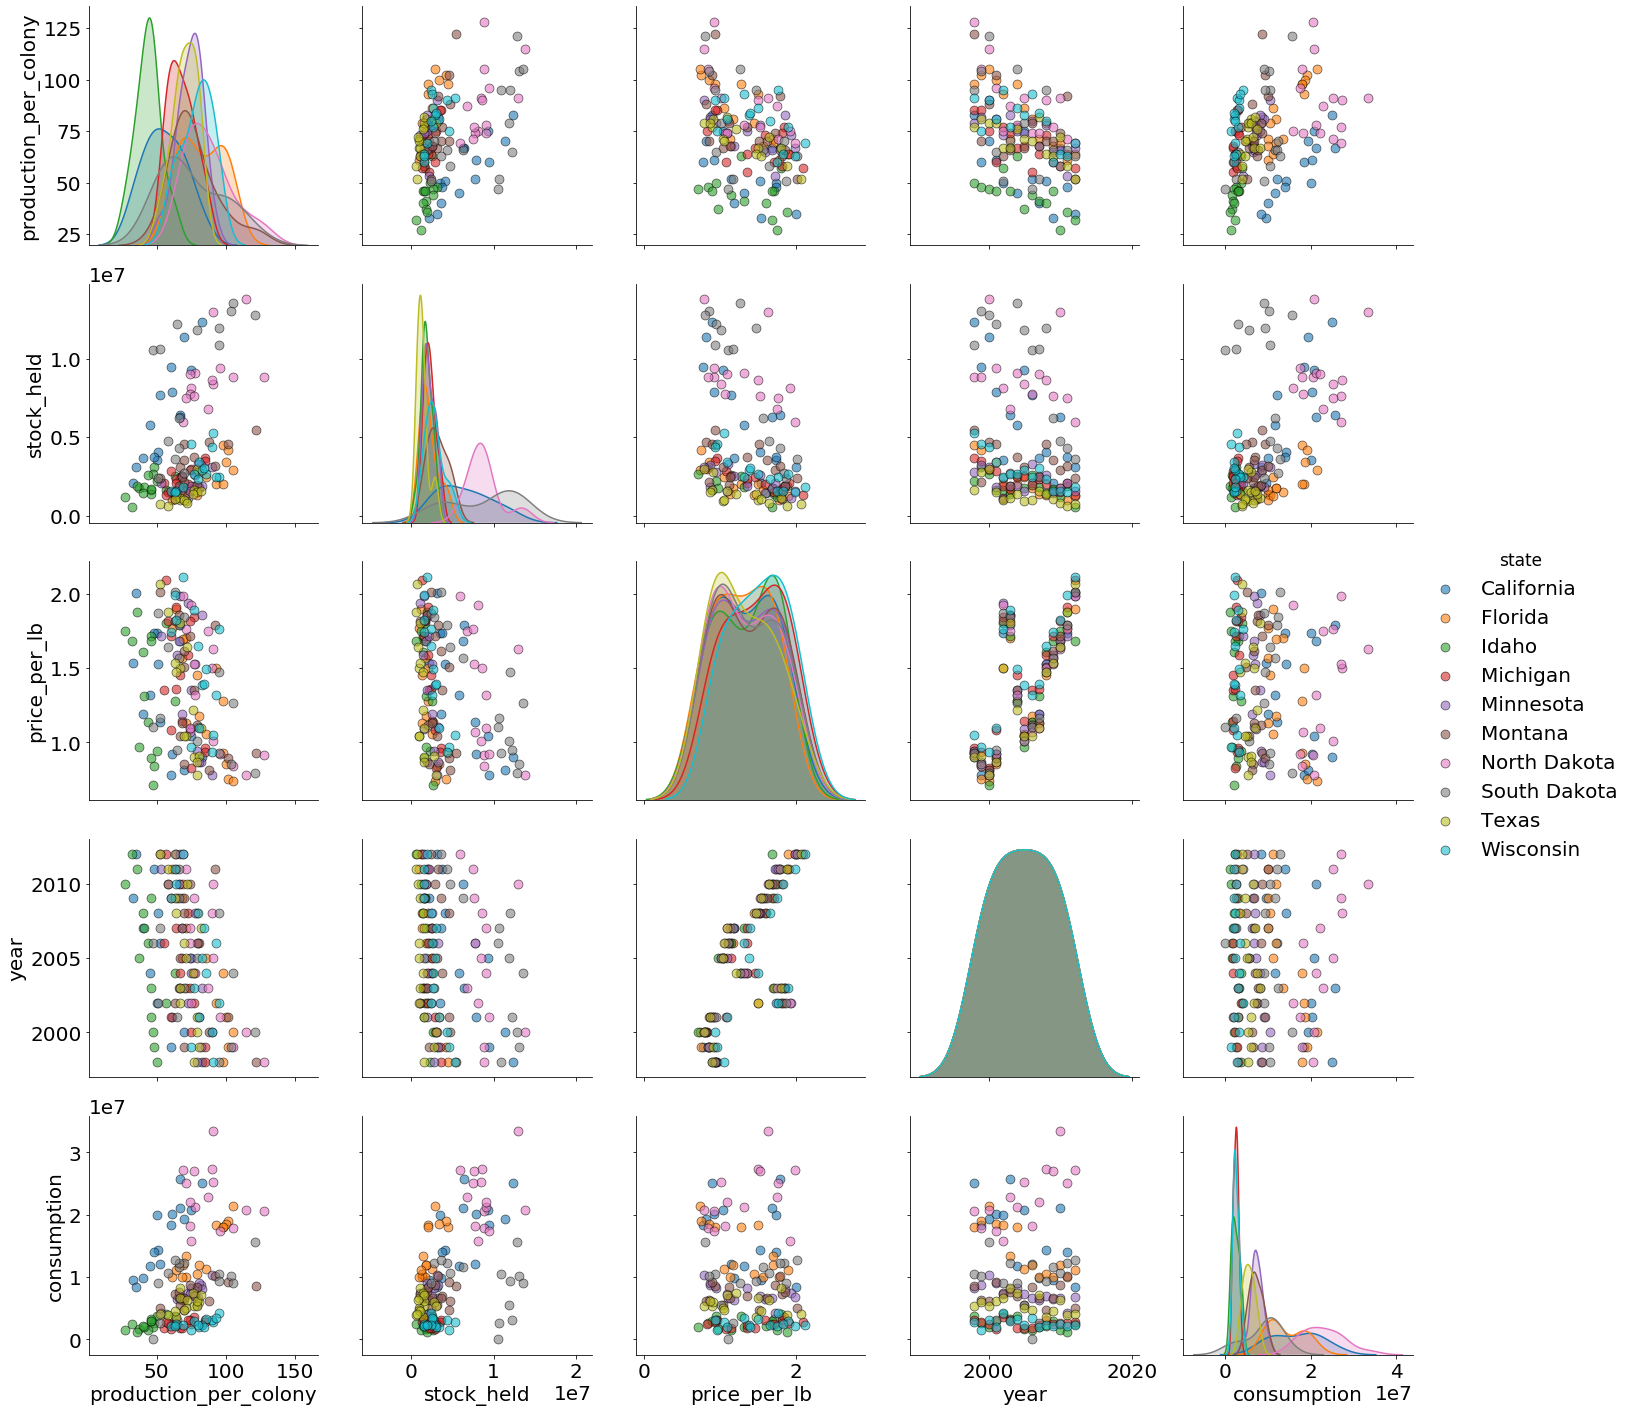

In [71]:
sns.pairplot(data.loc[data['state'].isin(list(top10_states_by_production.state))], hue='state',
            diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
            height=4, vars = ['production_per_colony','stock_held','price_per_lb','year','consumption'])